In [16]:
#this example takes recipes of cupcakes and muffins to train a svm model (source: Simplilearn youtube course) 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline

In [17]:
#reading data
recipies = pd.read_csv("Cupcakes vs Muffins.csv")
recipies.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


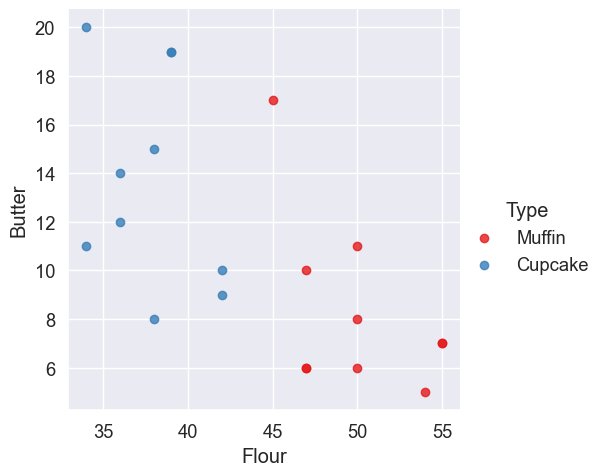

In [52]:
#plot data
x='Flour'
y='Butter'
sns.lmplot(x=x,y=y,data=recipies,hue='Type',palette='Set1',fit_reg=False)

In [53]:
#format type column to number
type_cake = np.where( recipies['Type'] == 'Muffin', 0, 1) #if muffing -> 0 if cupcake -> 1
features  = recipies[[x,y]].values #. values to get the numpy array instead of the dataframe

In [54]:
#model
model = svm.SVC(kernel='linear')
fit   = model.fit(features,type_cake) #no splitting because this is a simple data

In [55]:
#visualization
w = model.coef_[0] #vector parallel to the line separating the two types of cake
b = model.intercept_[0]

a = -w[0]/w[1]
xx = np.linspace(30,60)
yy = a*xx - (b/w[1])

(0.0, 40.0)

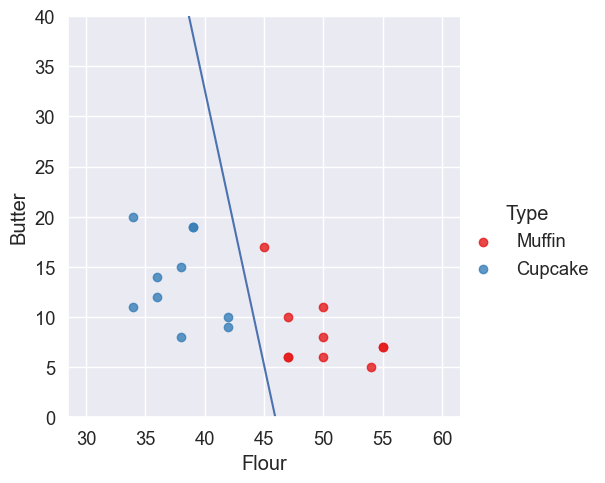

In [56]:
sns.lmplot(x=x,y=y,data=recipies,hue='Type',palette='Set1',fit_reg=False)
plt.plot(xx,yy)
plt.ylim([0,40])

In [70]:
def predict_cake(ingr1,ingr2):
    predict = model.predict([[ingr1,ingr2]])
    return predict

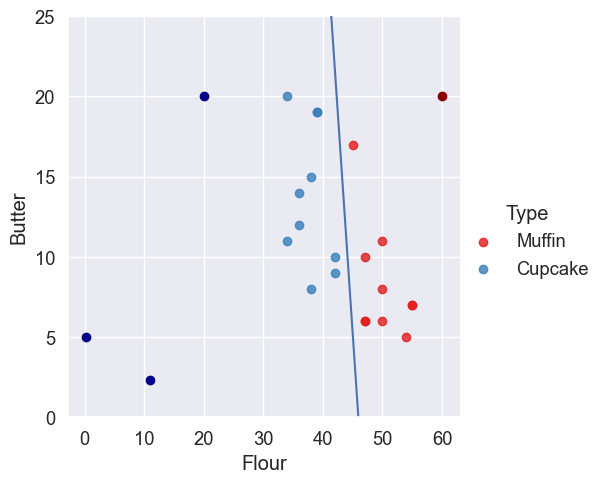

In [72]:
sns.lmplot(x=x,y=y,data=recipies,hue='Type',palette='Set1',fit_reg=False)
plt.plot(xx,yy)
plt.ylim([0,25])

untested_recipies = [[0.2,5], [20,20], [11,2.3], [60,20]]
color_dict = {0:'darkred',1:'darkblue'}
for un in untested_recipies:
    predict_untested = predict_cake(un[0],un[1])[0]
    plt.scatter(un[0],un[1],c=color_dict[predict_untested])